In [1]:

# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import networkx as nx
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.colors as mcolors
from itertools import combinations
from matplotlib.lines import Line2D

In [2]:
df = pd.read_csv('../data/clean_iflow_data.csv')

In [3]:
df.head()

,Unnamed: 0,id_orden,cliente,localidad,direccion,latitud,longitud,bultos,unidades,peso,...,visita_planificada,inicio_visita,fin_visita,dia,mes,hora,diferencia_minutos,dia_str,duracion_visita_min,duracion_visita_horas
0,1,74956,70,CAPITAL,VIDAL 2044,-34.564779,-58.459956,2.516667,30,24.910,...,2024-05-23 12:06:00,2024-05-23 14:13:53,2024-05-23 14:14:53,23.0,5.0,14.0,308.883333,jueves,1.000000,0.016667
1,2,74956,70,CAPITAL,VIDAL 2044,-34.564779,-58.459956,2.866667,38,26.260,...,2024-05-10 12:05:00,2024-05-10 16:43:00,2024-05-10 16:43:00,10.0,5.0,16.0,458.000000,viernes,0.000000,0.000000
2,3,74956,70,CAPITAL,VIDAL 2044,-34.564779,-58.459956,2.400000,32,24.888,...,2024-05-30 12:03:00,2024-05-30 09:41:36,2024-05-30 09:50:08,30.0,5.0,9.0,47.133333,jueves,8.533333,0.142222
3,4,74956,70,CAPITAL,VIDAL 2044,-34.564779,-58.459956,1.800000,28,14.040,...,2024-06-13 12:14:00,2024-06-13 13:32:55,2024-06-13 13:39:55,13.0,6.0,13.0,265.916667,jueves,7.000000,0.116667
4,5,74956,70,CAPITAL,VIDAL 2044,-34.564779,-58.459956,2.116667,31,14.377,...,2024-06-27 12:27:00,2024-06-27 15:36:00,2024-06-27 15:36:00,27.0,6.0,15.0,369.000000,jueves,0.000000,0.000000


In [4]:
df['fecha'] = pd.to_datetime(df['fin_visita'], format='%Y-%m-%d %H:%M:%S', errors='coerce').dt.date
df.head()


,Unnamed: 0,id_orden,cliente,localidad,direccion,latitud,longitud,bultos,unidades,peso,...,inicio_visita,fin_visita,dia,mes,hora,diferencia_minutos,dia_str,duracion_visita_min,duracion_visita_horas,fecha
0,1,74956,70,CAPITAL,VIDAL 2044,-34.564779,-58.459956,2.516667,30,24.910,...,2024-05-23 14:13:53,2024-05-23 14:14:53,23.0,5.0,14.0,308.883333,jueves,1.000000,0.016667,2024-05-23
1,2,74956,70,CAPITAL,VIDAL 2044,-34.564779,-58.459956,2.866667,38,26.260,...,2024-05-10 16:43:00,2024-05-10 16:43:00,10.0,5.0,16.0,458.000000,viernes,0.000000,0.000000,2024-05-10
2,3,74956,70,CAPITAL,VIDAL 2044,-34.564779,-58.459956,2.400000,32,24.888,...,2024-05-30 09:41:36,2024-05-30 09:50:08,30.0,5.0,9.0,47.133333,jueves,8.533333,0.142222,2024-05-30
3,4,74956,70,CAPITAL,VIDAL 2044,-34.564779,-58.459956,1.800000,28,14.040,...,2024-06-13 13:32:55,2024-06-13 13:39:55,13.0,6.0,13.0,265.916667,jueves,7.000000,0.116667,2024-06-13
4,5,74956,70,CAPITAL,VIDAL 2044,-34.564779,-58.459956,2.116667,31,14.377,...,2024-06-27 15:36:00,2024-06-27 15:36:00,27.0,6.0,15.0,369.000000,jueves,0.000000,0.000000,2024-06-27


In [5]:
df_selected_date =  df[df['fecha'] == dt.date(2024, 5, 23)]
df_geo = df_selected_date[['cliente', 'latitud', 'longitud', 'fin_visita']].sort_values(by='fin_visita').reset_index()
df_geo['order'] = np.arange(1, len(df_geo) + 1)
df_geo.head()


,index,cliente,latitud,longitud,fin_visita,order
0,4295,20,-34.608881,-58.441359,2024-05-23 07:15:04,1
1,3913,20,-34.610435,-58.441149,2024-05-23 07:30:08,2
2,14716,20,-34.615888,-58.441969,2024-05-23 07:42:30,3
3,22240,20,-34.608559,-58.424585,2024-05-23 08:05:20,4
4,17964,20,-34.605884,-58.425633,2024-05-23 08:13:31,5


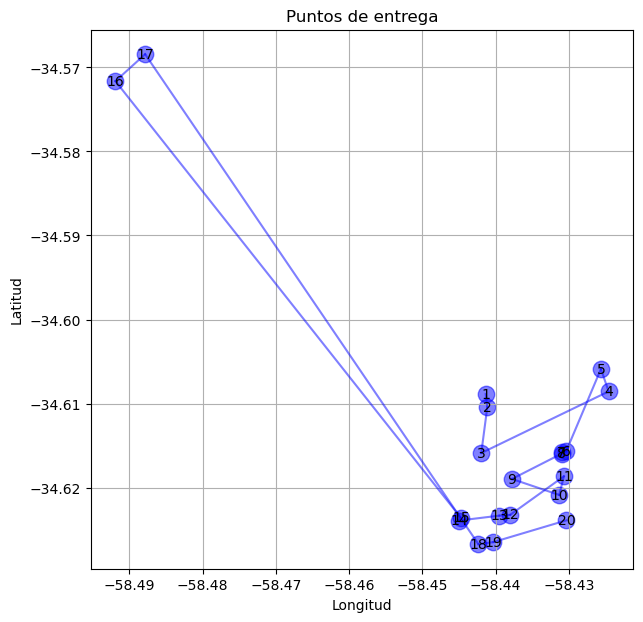

In [16]:
plt.figure(figsize=(7, 7))
for i, row in df_geo.head(20).iterrows():
    plt.scatter(row['longitud'], row['latitud'], s=140, c='blue', marker='o', alpha=0.5)
    plt.text(row['longitud'], row['latitud'], str(row['order']), ha='center', va='center')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Puntos de entrega')
plt.grid(True)
for i in range(len(df_geo.head(20)) - 1):
    plt.plot([df_geo.head(20).iloc[i]['longitud'], df_geo.head(20).iloc[i+1]['longitud']], [df_geo.head(20).iloc[i]['latitud'], df_geo.head(20).iloc[i+1]['latitud']], color='blue', alpha=0.5)
plt.savefig('../images/grafico1.png')
plt.show()


In [7]:
def estimate_time_distance(lat1, lon1, lat2, lon2, avg_speed_kmh=30):
    """
    Estimates travel time between two points given by latitude/longitude coordinates.
    
    Parameters:
    -----------
    lat1, lon1 : float
        Latitude and longitude of starting point
    lat2, lon2 : float 
        Latitude and longitude of ending point
    avg_speed_kmh : float
        Average speed in kilometers per hour (default 30 km/h for urban areas)
        
    Returns:
    --------
    float
        Estimated travel time in minutes
    """
    # Convert latitude/longitude to radians
    lat1, lon1 = np.radians(lat1), np.radians(lon1)
    lat2, lon2 = np.radians(lat2), np.radians(lon2)
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Earth's radius in kilometers
    r = 6371
    
    # Calculate distance in kilometers
    distance = c * r
    
    # Calculate time in minutes
    time_hours = distance / avg_speed_kmh
    time_minutes = time_hours * 60
    
    return time_minutes


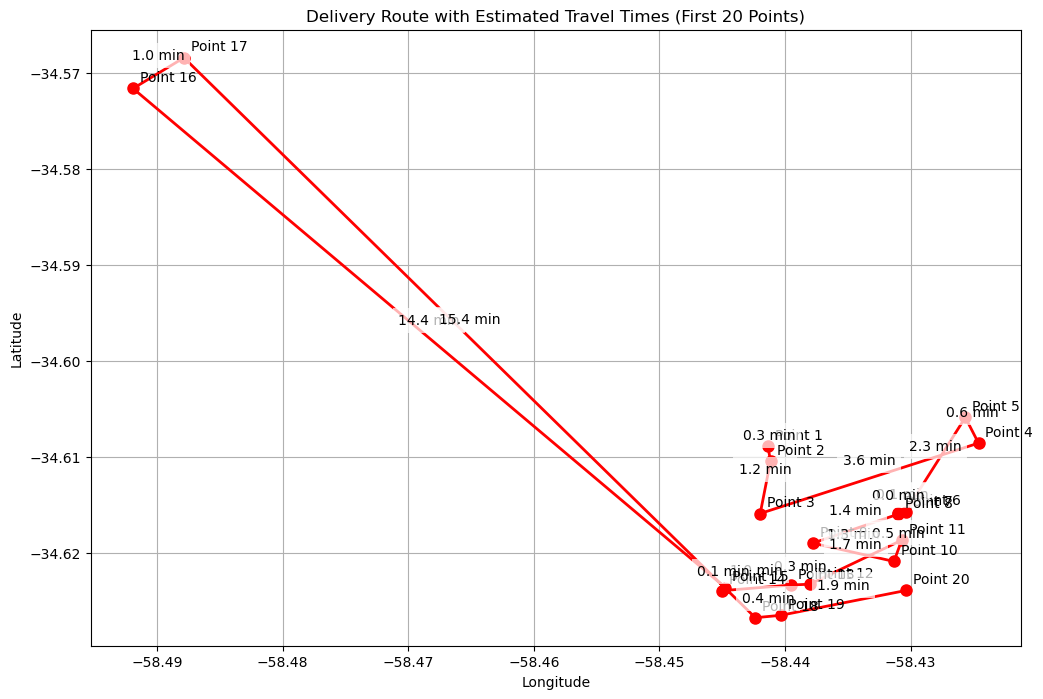

In [8]:
# Create a new figure with specified size
plt.figure(figsize=(12, 8))

# Plot points and lines
plt.plot(df_geo['longitud'].head(20), df_geo['latitud'].head(20), 'ro-', markersize=8, linewidth=2)

# Add point labels
for i, row in df_geo.head(20).iterrows():
    plt.annotate(f'Point {i+1}', 
                (row['longitud'], row['latitud']),
                xytext=(5, 5), textcoords='offset points')
    
    # Add time estimates between consecutive points
    if i < len(df_geo.head(20))-1:
        next_row = df_geo.iloc[i+1]
        time = estimate_time_distance(row['latitud'], row['longitud'],
                                   next_row['latitud'], next_row['longitud'])
        
        # Calculate midpoint for time label
        mid_lon = (row['longitud'] + next_row['longitud']) / 2
        mid_lat = (row['latitud'] + next_row['latitud']) / 2
        
        # Add time label
        plt.annotate(f'{time:.1f} min',
                    (mid_lon, mid_lat),
                    xytext=(0, 10), textcoords='offset points',
                    ha='center',
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.title('Delivery Route with Estimated Travel Times (First 20 Points)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


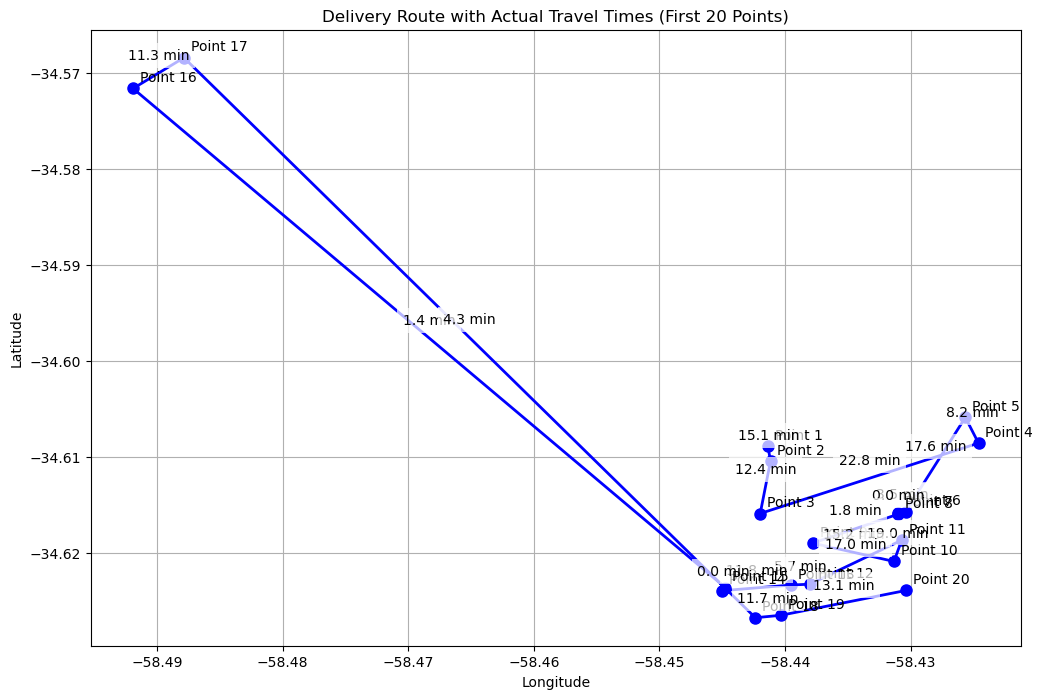

In [9]:
# Create a new figure with specified size
plt.figure(figsize=(12, 8))

# Plot points and lines
plt.plot(df_geo['longitud'].head(20), df_geo['latitud'].head(20), 'bo-', markersize=8, linewidth=2)

# Add point labels and actual travel times
for i, row in df_geo.head(20).iterrows():
    plt.annotate(f'Point {i+1}', 
                (row['longitud'], row['latitud']),
                xytext=(5, 5), textcoords='offset points')
    
    # Add actual time differences between consecutive points
    if i < len(df_geo.head(20))-1:
        next_row = df_geo.iloc[i+1]
        
        # Calculate time difference in minutes between fin_visita timestamps
        time_diff = (pd.to_datetime(next_row['fin_visita']) - 
                    pd.to_datetime(row['fin_visita'])).total_seconds() / 60
        
        # Calculate midpoint for time label
        mid_lon = (row['longitud'] + next_row['longitud']) / 2
        mid_lat = (row['latitud'] + next_row['latitud']) / 2
        
        # Add time label
        plt.annotate(f'{time_diff:.1f} min',
                    (mid_lon, mid_lat),
                    xytext=(0, 10), textcoords='offset points',
                    ha='center',
                    bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

plt.title('Delivery Route with Actual Travel Times (First 20 Points)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


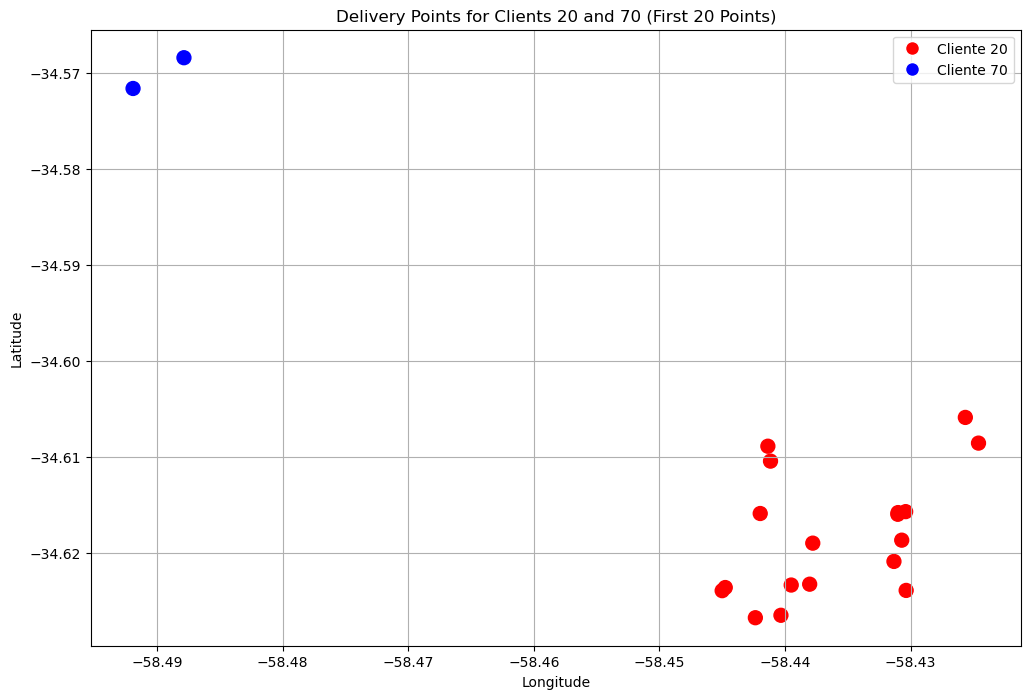

In [10]:
# Create a new figure with specified size
plt.figure(figsize=(12, 8))

# Create a color map for clients 20 and 70
colors = ['red' if cliente == 20 else 'blue' if cliente == 70 else 'gray' 
          for cliente in df_geo['cliente'].head(20)]

# Create a scatter plot with points colored by cliente
scatter = plt.scatter(df_geo['longitud'].head(20), df_geo['latitud'].head(20),
                     c=colors,
                     s=100)  # Size of points


legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
                         label='Cliente 20', markersize=10),
                  Line2D([0], [0], marker='o', color='w', markerfacecolor='blue',
                         label='Cliente 70', markersize=10)]
plt.legend(handles=legend_elements)

plt.title('Delivery Points for Clients 20 and 70 (First 20 Points)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

Condiciones
1. Entregas unicas por cliente
2. Tiempo y distancia entre entregas 
3. Tiempo estimado no puede ser menor a tiempo real ya que el tiempo de entrega no se toma en cuenta.

In [11]:
df_muestra = df_geo.head(40)

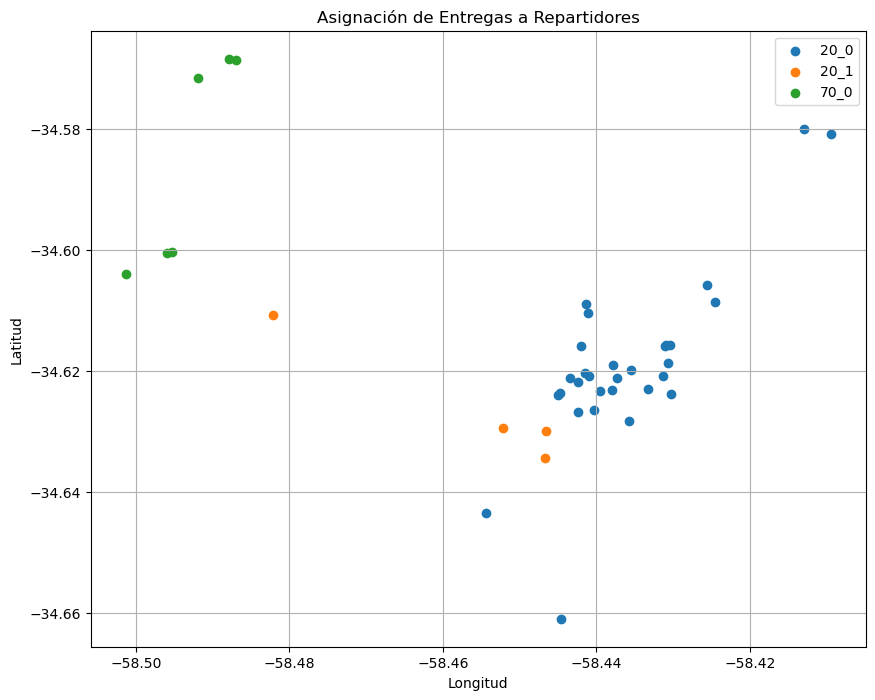

In [12]:
def assign_deliveries_to_drivers(df_muestra, velocidad_promedio=30.0, tiempo_minimo_separacion=5, factor_desvio=0.5):
    """
    Asigna entregas a repartidores usando coloreo de grafos.
    
    Args:
        df_muestra: DataFrame con las entregas a procesar
        velocidad_promedio: Velocidad promedio de los repartidores en km/h
        tiempo_minimo_separacion: Tiempo mínimo entre entregas en minutos
        factor_desvio: Factor de desvío permitido entre tiempo estimado y real
        
    Returns:
        dict: Diccionario con las asignaciones {id_repartidor: [lista_de_entregas]}
    """
    # Diccionario que almacenará las asignaciones finales de entregas a repartidores
    asignaciones_repartidores = {}

    # Procesar las entregas agrupadas por cliente
    for cliente, grupo in df_muestra.groupby('cliente'):
        # Resetear índices para facilitar el procesamiento
        entregas = grupo.reset_index(drop=True)
        n = len(entregas)
        
        # Crear un grafo vacío para modelar conflictos entre entregas
        G = nx.Graph()
        
        # Añadir un nodo por cada entrega del cliente
        for idx in entregas.index:
            G.add_node(idx)
        
        # Analizar pares de entregas para detectar conflictos
        for i, j in combinations(entregas.index, 2):
            d1 = entregas.loc[i]  # Primera entrega del par
            d2 = entregas.loc[j]  # Segunda entrega del par
            
            # Asegurar que los tiempos de entrega estén en formato datetime
            d1_fin = pd.to_datetime(d1['fin_visita']) if isinstance(d1['fin_visita'], str) else d1['fin_visita']
            d2_fin = pd.to_datetime(d2['fin_visita']) if isinstance(d2['fin_visita'], str) else d2['fin_visita']
            
            # Calcular la diferencia temporal entre entregas
            diferencia_tiempo_min = abs((d2_fin - d1_fin).total_seconds()) / 60.0
            diferencia_tiempo_horas = diferencia_tiempo_min / 60.0
            
            # Calcular la distancia física entre los puntos de entrega
            distancia = estimate_time_distance(d1['longitud'], d1['latitud'], d2['longitud'], d2['latitud'])
            
            # Calcular el tiempo mínimo necesario para viajar entre puntos
            tiempo_viaje = distancia / velocidad_promedio
            
            # Determinar si existe un conflicto entre las entregas
            if diferencia_tiempo_min <= tiempo_minimo_separacion:
                # Entregas muy cercanas en tiempo: asignar al mismo repartidor
                pass
            elif diferencia_tiempo_horas < tiempo_viaje * factor_desvio:
                # El tiempo real es mucho menor al tiempo estimado necesario
                # Añadir una arista al grafo indicando que no pueden ser realizadas por el mismo repartidor
                G.add_edge(i, j)
        
        # Aplicar algoritmo de coloreo de grafos para asignar repartidores
        # Cada color representa un repartidor diferente
        coloreo = nx.coloring.greedy_color(G, strategy='largest_first')
        
        # Distribuir las entregas entre los repartidores según el coloreo
        for idx, color in coloreo.items():
            id_repartidor = f'{cliente}_{color}'
            if id_repartidor not in asignaciones_repartidores:
                asignaciones_repartidores[id_repartidor] = []
            asignaciones_repartidores[id_repartidor].append(entregas.loc[idx])

    return asignaciones_repartidores

# Ejecutar la asignación
asignaciones = assign_deliveries_to_drivers(df_muestra)

# Visualizar las asignaciones en un mapa
colores = list(mcolors.TABLEAU_COLORS.keys())
plt.figure(figsize=(10, 8))

# Graficar las entregas de cada repartidor con un color distinto
for idx, (repartidor, entregas_repartidor) in enumerate(asignaciones.items()):
    entregas_df = pd.DataFrame(entregas_repartidor)
    latitudes = entregas_df['latitud']
    longitudes = entregas_df['longitud']
    color = colores[idx % len(colores)]
    plt.scatter(longitudes, latitudes, c=color, label=repartidor)

# Configurar detalles del gráfico
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Asignación de Entregas a Repartidores')
plt.legend()
plt.grid(True)
plt.show()

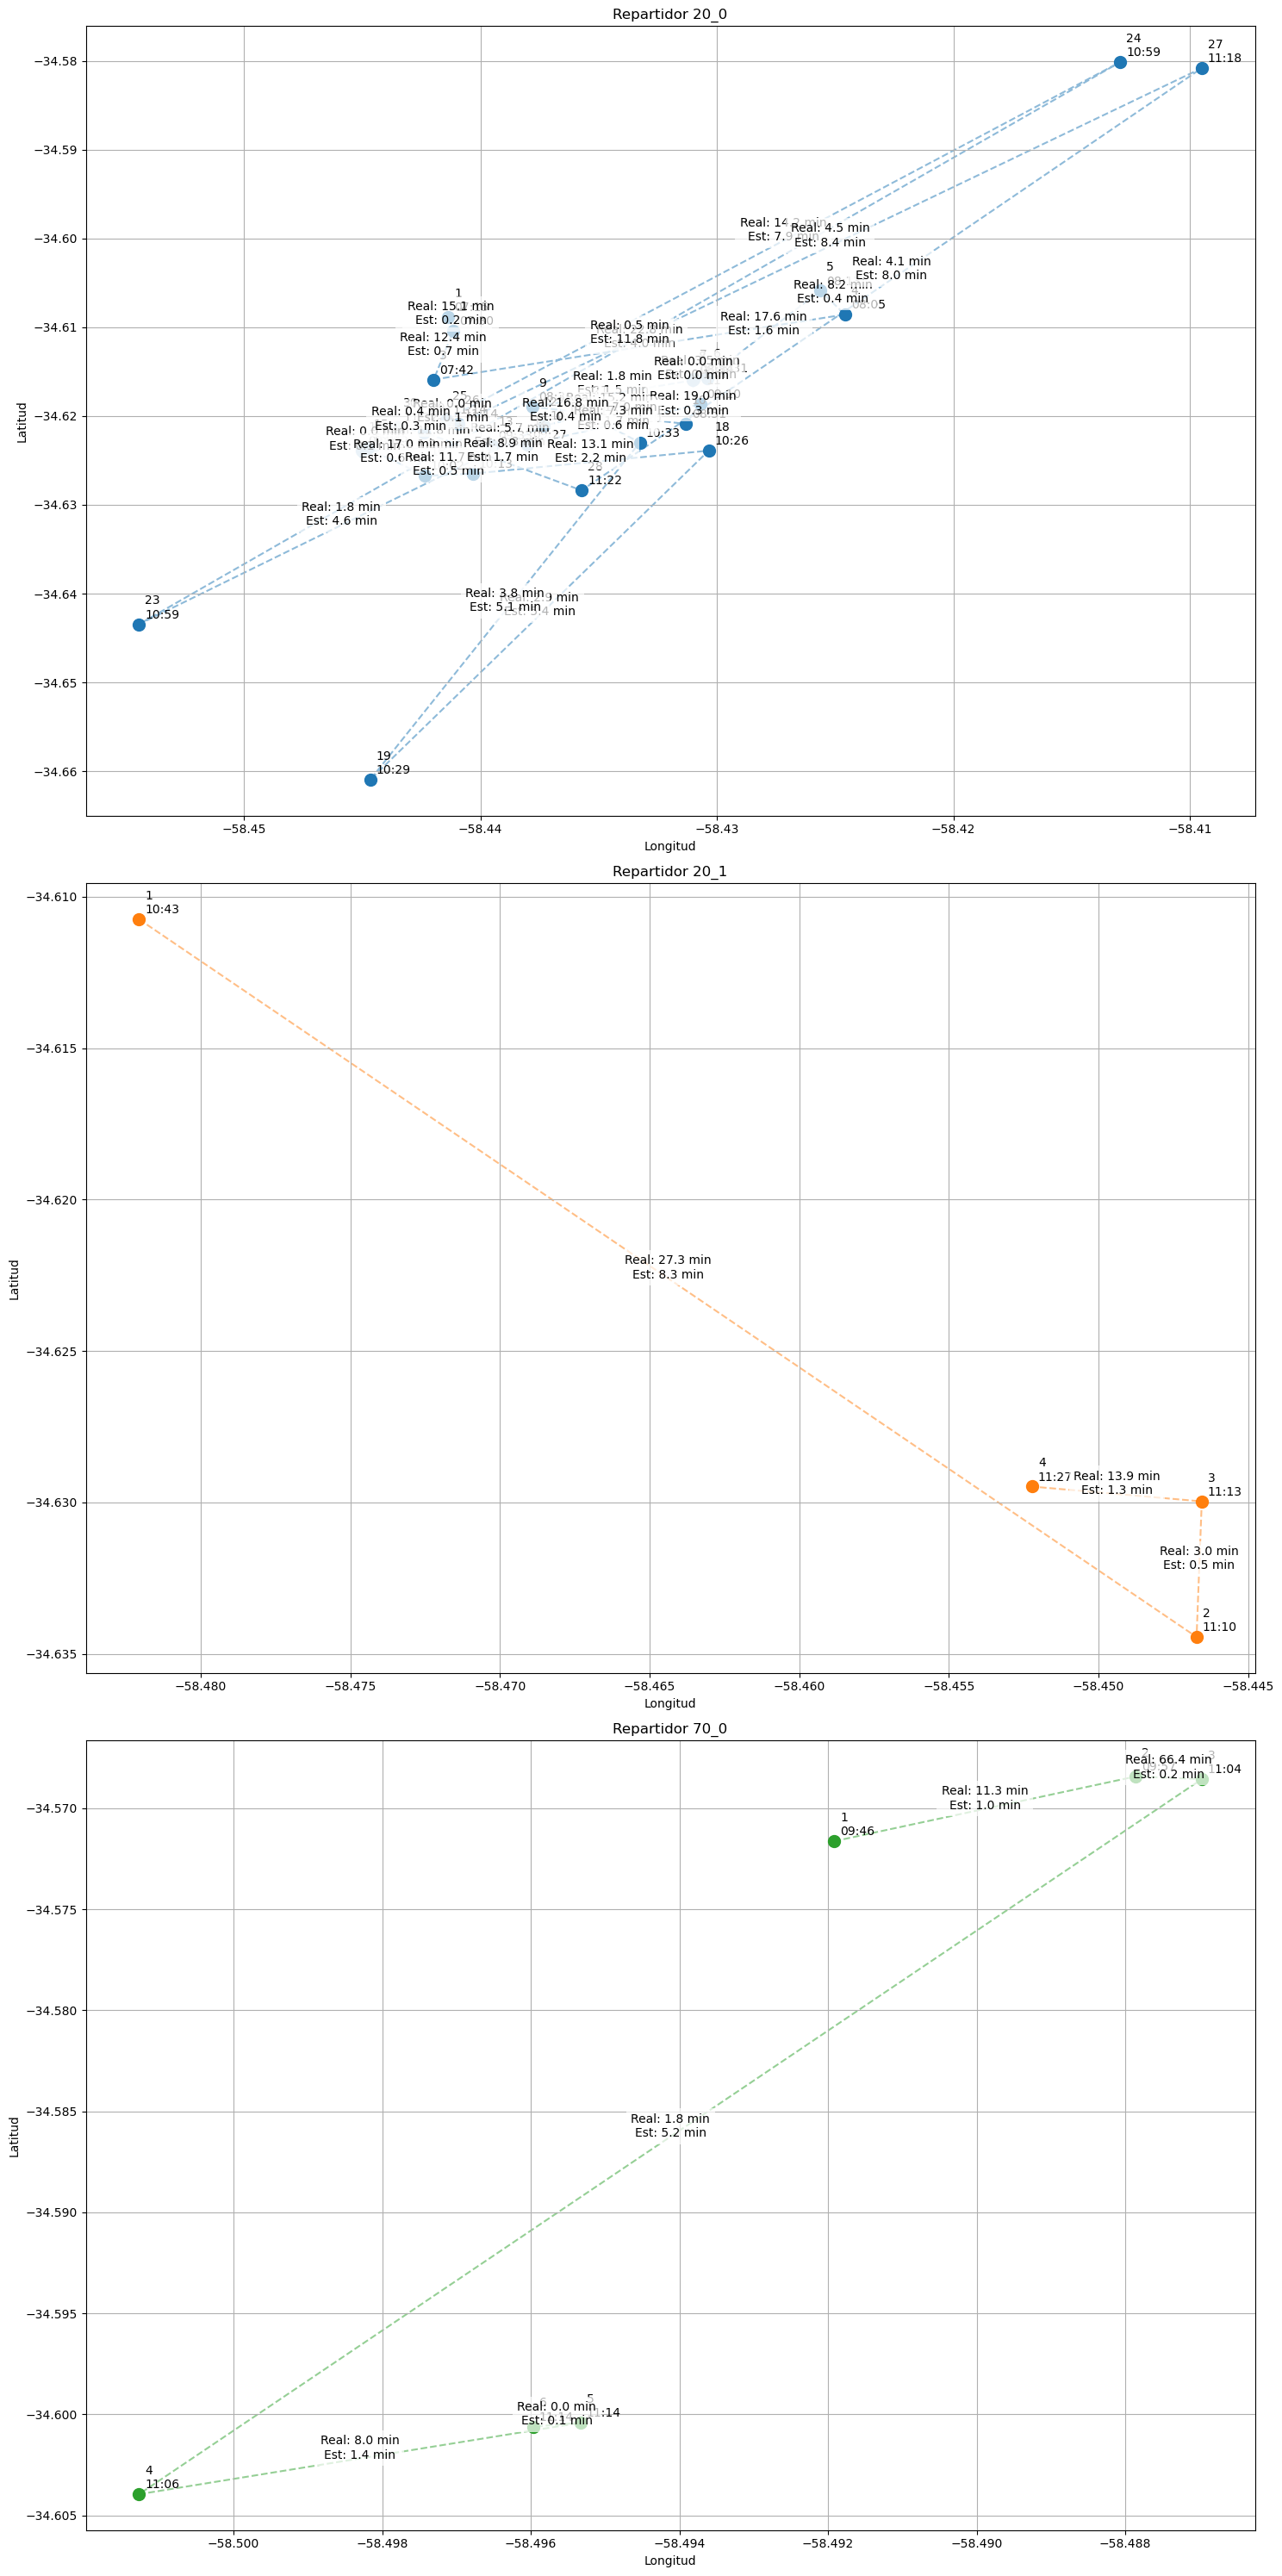

In [13]:
# Crear una figura con subplots verticales
num_repartidores = len(asignaciones)
fig, axs = plt.subplots(num_repartidores, 1, figsize=(15, 10*num_repartidores))

# Graficar las entregas de cada repartidor en su propio subplot
for idx, (repartidor, entregas_repartidor) in enumerate(asignaciones.items()):
    entregas_df = pd.DataFrame(entregas_repartidor)
    # Ordenar entregas cronológicamente
    entregas_df = entregas_df.sort_values('fin_visita')
    
    # Obtener coordenadas
    latitudes = entregas_df['latitud']
    longitudes = entregas_df['longitud']
    fin_visitas = entregas_df['fin_visita']
    
    # Graficar puntos y líneas
    color = colores[idx % len(colores)]
    axs[idx].scatter(longitudes, latitudes, c=color, s=100, zorder=2)
    
    # Conectar puntos con líneas según orden cronológico
    axs[idx].plot(longitudes, latitudes, c=color, alpha=0.5, linestyle='--', zorder=1)
    
    # Configurar detalles del subplot
    axs[idx].set_title(f'Repartidor {repartidor}')
    axs[idx].set_xlabel('Longitud')
    axs[idx].set_ylabel('Latitud')
    axs[idx].grid(True)
    
    # Agregar números y tiempos a los puntos para mostrar el orden
    for i, (lon, lat, tiempo) in enumerate(zip(longitudes, latitudes, fin_visitas)):
        # Convertir a datetime si es string
        if isinstance(tiempo, str):
            tiempo = pd.to_datetime(tiempo)
        tiempo_str = tiempo.strftime('%H:%M')
        axs[idx].annotate(f'{i+1}\n{tiempo_str}', (lon, lat), xytext=(5, 5), 
                         textcoords='offset points')
    
    # Agregar diferencias de tiempo y tiempo estimado en el medio de las líneas
    for i in range(len(entregas_df)-1):
        tiempo1 = pd.to_datetime(fin_visitas.iloc[i])
        tiempo2 = pd.to_datetime(fin_visitas.iloc[i+1])
        diferencia = (tiempo2 - tiempo1).total_seconds() / 60  # Diferencia en minutos
        
        # Calcular punto medio entre entregas
        lon_mid = (longitudes.iloc[i] + longitudes.iloc[i+1]) / 2
        lat_mid = (latitudes.iloc[i] + latitudes.iloc[i+1]) / 2
        
        # Calcular tiempo estimado usando haversine
        tiempo_estimado = estimate_time_distance(
            longitudes.iloc[i], latitudes.iloc[i],
            longitudes.iloc[i+1], latitudes.iloc[i+1]
        )
        
        # Agregar anotación con la diferencia de tiempo y tiempo estimado
        axs[idx].annotate(f'Real: {diferencia:.1f} min\nEst: {tiempo_estimado:.1f} min', 
                         (lon_mid, lat_mid),
                         bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
                         ha='center')

plt.tight_layout()
plt.show()